# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy

from citipy import citipy 

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
# Create placeholders to hold values

cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []
sun_rise = []
sun_set = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
# query_url

i = 1
for city in cities:
    response = requests.get(query_url + city).json()
   #  cities.append(response['city']['country'])
    
    
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        sun_rise.append(response["sys"]["sunrise"])
        sun_set.append(response["sys"]["sunset"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("Sorry NO City Found. skipping.")

Beginning Data Retrieval 
-----------------------------
Processing record 1|kushima
Sorry NO City Found. skipping.
Processing record 2|ust-ilimsk
Processing record 3|kodiak
Processing record 4|esperance
Processing record 5|newport
Processing record 6|westport
Processing record 7|timra
Processing record 8|cravo norte
Processing record 9|bud
Processing record 10|mataura
Processing record 11|cape town
Processing record 12|airai
Processing record 13|kenai
Processing record 14|ushuaia
Processing record 15|punta arenas
Processing record 16|bethel
Processing record 17|rikitea
Processing record 18|santa cruz
Sorry NO City Found. skipping.
Processing record 19|katsuura
Processing record 20|dasoguz
Processing record 21|atherton
Sorry NO City Found. skipping.
Processing record 22|ribeira grande
Processing record 23|soyo
Processing record 24|port alfred
Sorry NO City Found. skipping.
Processing record 25|bredasdorp
Processing record 26|porto novo
Processing record 27|coracao de jesus
Processing re

Processing record 239|rundu
Processing record 240|upernavik
Processing record 241|tarko-sale
Processing record 242|tuatapere
Processing record 243|novo aripuana
Processing record 244|le port
Processing record 245|ovsyanka
Processing record 246|santa isabel
Processing record 247|ayr
Processing record 248|laguna
Sorry NO City Found. skipping.
Processing record 249|north bend
Processing record 250|bathsheba
Processing record 251|ifanadiana
Processing record 252|vardo
Processing record 253|pimenta bueno
Processing record 254|morehead
Processing record 255|paamiut
Processing record 256|hasaki
Processing record 257|contamana
Processing record 258|kasur
Processing record 259|nisia floresta
Processing record 260|uspenka
Processing record 261|pisco
Processing record 262|kavaratti
Processing record 263|karratha
Processing record 264|troitsko-pechorsk
Processing record 265|salinopolis
Processing record 266|monroe
Processing record 267|el vigia
Processing record 268|zhengjiatun
Processing record 2

Processing record 479|half moon bay
Processing record 480|sumbe
Sorry NO City Found. skipping.
Processing record 481|itaituba
Processing record 482|miguel hidalgo
Processing record 483|belaya gora
Processing record 484|viedma
Processing record 485|sur
Processing record 486|barentu
Processing record 487|adre
Processing record 488|anadyr
Processing record 489|coquimbo
Processing record 490|pontes e lacerda
Processing record 491|port hardy
Processing record 492|rawson
Processing record 493|tornio
Processing record 494|phuket
Processing record 495|taybad
Processing record 496|sakaiminato
Processing record 497|yeppoon
Processing record 498|rivadavia
Processing record 499|zhuhai
Processing record 500|kieta
Processing record 501|sault sainte marie
Sorry NO City Found. skipping.
Processing record 502|coihaique
Processing record 503|yang talat
Sorry NO City Found. skipping.
Sorry NO City Found. skipping.
Sorry NO City Found. skipping.
Sorry NO City Found. skipping.
Processing record 504|sibolga

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
weather_glossary = {
    #"city": cities,
    #"lat": lat,
    #"temp": temp
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Max_Temp": max_temp,        
    "Humidity": humidity,
    "Lat": lat,  
    "Lng": lng,
    "City": city_name,
    "Wind Speed": wind_speed,
    "Sun Rise": sun_rise,
    "Sun Set": sun_set
        
}
weather_detail = pd.DataFrame(weather_glossary)

#Exporting data to csv
weather_detail.to_csv(r'C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\city_weather_detail.csv', index=False)


#Displaying dataframe
weather_detail.head()


,Cloudiness,Country,Date,Max_Temp,Humidity,Lat,Lng,City,Wind Speed,Sun Rise,Sun Set
0,11,JP,1625847133,25.62,94,31.4583,131.2333,Kushima,2.64,1625861870,1625912552
1,92,RU,1625847134,13.98,65,58.0006,102.6619,Ust'-Ilimsk,1.53,1625862109,1625926028
2,75,US,1625847135,10.73,76,57.7900,-152.4072,Saint Paul Harbor,2.57,1625837004,1625900762
3,85,AU,1625847135,15.49,54,-33.8667,121.9000,Esperance,9.97,1625871407,1625907495
4,100,GB,1625847135,21.73,68,51.5877,-2.9984,Newport,4.12,1625803524,1625862519


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#No cities that have Humidity greater than 100%
weather_detail.describe()

,Cloudiness,Date,Max_Temp,Humidity,Lat,Lng,Wind Speed,Sun Rise,Sun Set
count,567.000000,5.670000e+02,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02,5.670000e+02
mean,51.442681,1.625847e+09,22.254621,67.287478,21.824590,16.830828,3.638536,1.542668e+09,1.542715e+09
std,39.269385,1.057333e+02,8.387442,21.847615,33.203857,89.414992,2.534770,3.584789e+08,3.584899e+08
min,0.000000,1.625846e+09,0.650000,3.000000,-54.800000,-179.166700,0.000000,0.000000e+00,0.000000e+00
25%,8.000000,1.625847e+09,17.020000,54.000000,-5.943050,-60.276200,1.785000,1.625799e+09,1.625849e+09
50%,55.000000,1.625847e+09,23.500000,72.000000,28.099600,18.423200,3.050000,1.625820e+09,1.625864e+09
75%,91.000000,1.625847e+09,27.750000,84.000000,50.308200,96.664250,5.115000,1.625835e+09,1.625889e+09
max,100.000000,1.625847e+09,47.000000,100.000000,78.218600,179.316700,14.080000,1.625941e+09,1.626001e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

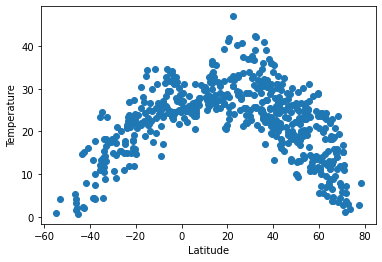

In [7]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_detail['Lat'],
y_values = weather_detail['Max_Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig(r"C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\Images\Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

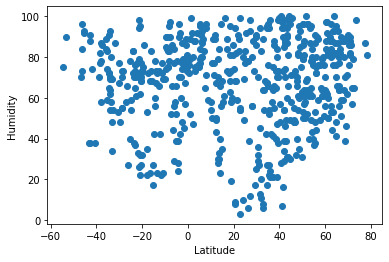

In [8]:
# Create a Scatter Plot for latitude vs humidity
x_values = weather_detail['Lat'],
y_values = weather_detail['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(r"C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\Images\Lat_vs_Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

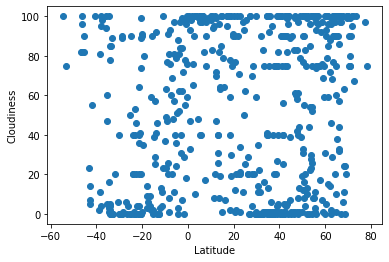

In [9]:
# Create a Scatter Plot for latitude vs cloudiness
x_values = weather_detail['Lat'],
y_values = weather_detail['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(r"C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\Images\Lat_vs_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

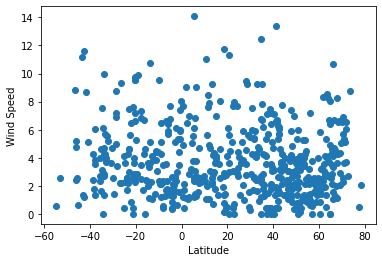

In [10]:
# Create a Scatter Plot for latitude vs wind speed
x_values = weather_detail['Lat'],
y_values = weather_detail['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig(r"C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\Images\Lat_vs_Wind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [46]:
northern = weather_detail.loc[weather_detail["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_detail.loc[weather_detail["Lat"] < 0.0]
southern.reset_index(inplace=True)

The r-value is: 0.42103660909375124


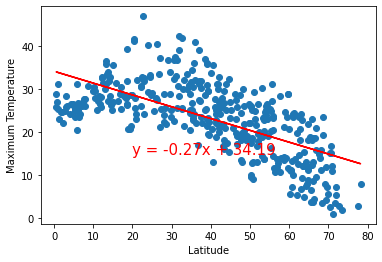

In [52]:
# Define the plot

#def plotLinearRegression(x_value,y_value,xlab,ylab,labpos):
    #(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
    #print(f"The r-value is: {rvalue**2}")
    #regress_values = x_values * slope + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
x_values = northern['Lat']
y_values = northern['Max_Temp']
#plt.scatter(x_values,y_values)
#plt.xlabel('Latitude')
#plt.ylabel('Temperature')
#plt.show()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create Plot
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig(r"C:\Users\kerry\DataBootCamp\python-api-challenge\WeatherPy\Images\North_Lat_vs_MaxTemp.png")
plt.show()

In [ ]:
Southern Hemisphere - Max Temp vs. Latitude Linear Regression¶

The r-value is: 0.6886780258890878


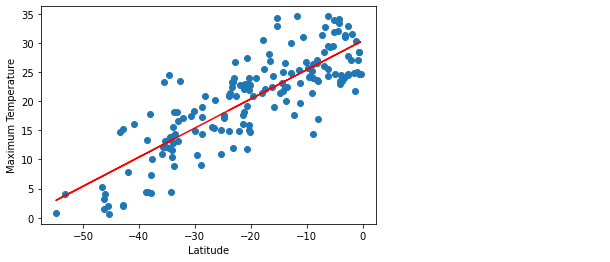

In [50]:
# Define the plot

#def plotLinearRegression(x_value,y_value,xlab,ylab,labpos):
    #(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
    #print(f"The r-value is: {rvalue**2}")
    #regress_values = x_values * slope + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
x_values = southern['Lat']
y_values = southern['Max_Temp']
#plt.scatter(x_values,y_values)
#plt.xlabel('Latitude')
#plt.ylabel('Temperature')
#plt.show()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create Plot
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.004888405493185613


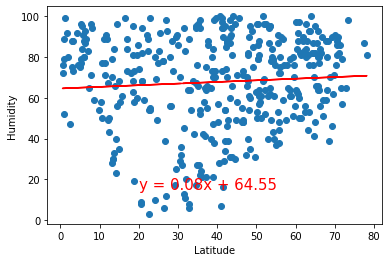

In [51]:
# Define the plot

#def plotLinearRegression(x_value,y_value,xlab,ylab,labpos):
    #(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
    #print(f"The r-value is: {rvalue**2}")
    #regress_values = x_values * slope + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
x_values = northern['Lat']
y_values = northern['Humidity']
#plt.scatter(x_values,y_values)
#plt.xlabel('Latitude')
#plt.ylabel('Temperature')
#plt.show()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create Plot
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression